# i. Perkenalan

**Nama: Hanifah**

**Batch: HCK-004**

---

## Problem Statement 

* Salah satu tantangan yang dihadapi oleh bisnis adalah ketidakpastian dalam forecast quantity permintaan dan persediaan product. Jika bisnis tidak dapat memperkirakan permintaan dan persediaan dengan tepat, ini dapat menyebabkan overstocking atau understocking. Dengan mengembangkan model yang dapat memprediksi Quantity dengan akurasi yang baik dapat membantu bisnis untuk mengoptimalkan persediaan dan mengurangi biaya yang terkait dengan overstocking dan understocking.


## Objective

* Mampu forecast Quanity pada periode berikutnya dari dataset ParagonCorp.
* Model kerja dapat mencapai Tingkat Akurasi yang baik.
* Mampu menjelaskan metodologi yang digunakan untuk setiap langkah, algoritma, manipulasi data, pembersihan data, dll.
* Mampu memberikan bagan atau metode terukur lainnya untuk membuktikan kesimpulan Anda.

---

# ii. Import library

In [1]:
# using for change data type
from datetime import datetime

# using for calculation
import numpy as np
import pandas as pd
import statsmodels.api as sm

# using for visualization
import matplotlib.pylab as plt
%matplotlib inline


# using for model evaluation 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# using for visualization foreacsting
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# using for Modeling
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt


import warnings
warnings.filterwarnings(action='ignore')

# iii. Data Loading

In [2]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--",'n/a','NaN','?']
df = pd.read_csv('sample_dataset_timeseries_noarea.csv',na_values = missing_values)
df

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [3]:
# Menampilkan 5 data atas
df.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


* Data tersebut adalah data transaksi penjualan produk pada minggu ke-52 dalam tahun 2021. Setiap baris mewakili penjualan satu jenis produk (product_item) dengan kuantitas tertentu (quantity) selama periode waktu dari tanggal awal minggu (week_start_date) hingga tanggal akhir minggu (week_end_date).

* Dalam data tersebut terdapat lima baris yang masing-masing merepresentasikan penjualan **produk ID** 0073377087c7ddace313ff829cd7b0b3, 012d2bb142b2d5e57330acbfd8e9ac52, 0192926e33d1153b63511a5b83eca843, 019502f6d13e383caa9b9673bf1302f8 dan 01e7ca6d4e21badc1d4225b6b2c7bd9e. Pada minggu ke-52 tahun 2021, dengan jumlah kuantitas masing-masing 41, 430, dan 4.

In [168]:
# Menampilkan 5 data bawah
df.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


In [4]:
# Melihat berapa jumlah kolom dan baris
df.shape


(102733, 5)

* Data terdiri dari 102733 baris dan 5 kolom

In [5]:
# Mencari data duplikasi
df[df.duplicated()].shape

(0, 5)

* Tidak terdapat duplikasi pada data

In [6]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [7]:
# Mengubah dtype pada datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

In [173]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


* Kolom week_start_date dan week_end_date sudah terganti sesuai dengan data type yang telah di setting yaitu type datetime64[ns]

In [8]:
# Mencari missing value
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

- Terdapat kolom yang missing di antaranya :
    * Kolom product_item
    
- Dalam hal ini akan di lakukan pengecekan percentage dari masing-masing kolom mising value tersebut mengacu terhadap:

    * MAR (Missing At Random) berarti bahwa kemungkinan terjadinya data yang hilang bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang secara acak, tetapi kemungkinan terjadi karena hubungannya dengan data yang tersedia dalam dataset.
    * MNAR (Missing Not At Random) berarti bahwa kemungkinan terjadinya data yang hilang tidak bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang tidak dihasilkan secara acak dan tidak dapat dianggap sebagai bagian dari sampel. Oleh karena itu, analisis statistik harus memperhitungkan dampak data yang hilang dalam hasil akhir.


In [9]:
# Mencari letak missing value pada product item
df.loc[df['product_item'].isnull()].head(2)

,week_number,week_start_date,week_end_date,product_item,quantity
18048,2022-12,2022-03-21,2022-03-27,NaN,119
19536,2022-13,2022-03-28,2022-04-03,NaN,147


In [10]:
#Looping untuk mencari % missing value
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"Persent missing value",':',df[i].isnull().sum()*100/df.shape[0],"%",df[i].dtype)

product_item Persent missing value : 0.0019467941167881791 % object


* Kolom product_item cenderung memiliki sedikit persentage missing value yaitu di 0.0019% maka akan di putuskan untuk dilakukan drop kolom missing value. berdasarkan asumsi saya jika data yang missing di di bawah 5% akan di lakukan drop tidak akan mempengaruhi model dari sebuah data.

In [11]:
# Menghapus baris yang memiliki missing value pada kolom product item
df = df.dropna(subset=['product_item'])

In [178]:
# Menampilkan jumlah missing value pada kolom product item setelah dihapus
null_counts = df['product_item'].isnull().sum()
print(f"Jumlah missing value pada kolom gender setelah dihapus: {null_counts}")

Jumlah missing value pada kolom gender setelah dihapus: 0


In [179]:
# Mencari missing value
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
dtype: int64

* Data sudah tidak ada missing value

# IV. Exploratory Data Analysis (EDA)

In [12]:
# Mencari informasi datetime
df.week_start_date.describe()

count                  102731
unique                     67
top       2022-08-01 00:00:00
freq                     1831
first     2021-12-27 00:00:00
last      2023-04-03 00:00:00
Name: week_start_date, dtype: object

- Data information dari 2021-12-27 - 2023-04-03

In [181]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
quantity,102731.000000,3191.621964,12074.741009,0.000000,75.000000,414.000000,1890.000000,774732.000000


* Berdasarkan statistik deskriptif yang diberikan, rata-rata jumlah quantity adalah sekitar 3191 dengan standar deviasi sekitar 12074, yang menunjukkan bahwa data memiliki variasi yang signifikan. Jumlah quantity terkecil adalah 0, sementara yang terbesar mencapai 774732.

* 25% dari jumlah quantity berada di bawah 75, sedangkan 50% (median) berada pada 414, dan 75% dari data berada di bawah 1890. 
* Dalam hal ini data dapat memberikan insight tentang seberapa besar permintaan atau penjualan dari produk atau layanan yang dihasilkan oleh ParagonCorp.
* Bisnis dapat menggunakan data ini untuk memperkirakan permintaan produk atau layanan di masa depan dan mengelola persediaan mereka secara efektif.

In [19]:
# Categorical overview
df.describe(include = 'object').T

,count,unique,top,freq
week_number,102731,67,2022-31,1831
product_item,102731,2309,0073377087c7ddace313ff829cd7b0b3,67


In [20]:
# Mengelompokan kolom name dengan kolom week number untuk dihitung jumlah datanya
df.groupby('week_number')[['quantity']].aggregate(['mean','count']).reset_index()

week_number     quantity      
                       mean count
0      2021-52   286.240000   450
1      2022-01  2557.999334  1501
2      2022-02  2802.257278  1477
3      2022-03  2803.430405  1480
4      2022-04  3279.587356  1471
..         ...          ...   ...
62     2023-10  3146.006588  1518
63     2023-11  3189.281146  1501
64     2023-12  3214.587838  1480
65     2023-13  3961.165677  1515
66     2023-14  2781.380000  1500

[67 rows x 3 columns]

* hasil agregasi diatas dapat memberikan insight mengenai performa bisnis pada setiap minggu yang diamati. Lebih spesifiknya, hasil mean dapat memberikan informasi mengenai rata-rata jumlah barang yang terjual pada setiap minggu, sementara hasil count dapat memberikan informasi mengenai jumlah transaksi yang terjadi pada setiap minggu. jika di lihat week 52 (450) memiliki jumlah transaksi yang sedikit di bandingkan dengan week 10 (1518)

In [21]:
def plot_average_quantity(df, start_date, end_date, freq):
    # filter data based on start and end dates
    df_filtered = df.loc[(df['week_start_date'] >= start_date) & (df['week_start_date'] <= end_date)]

    # set week_start_date as index
    df_filtered = df_filtered.set_index('week_start_date')

    # group by frequency
    if freq == 'week':
        df_freq = df_filtered.groupby(df_filtered.index.week)
    elif freq == 'quarter':
        df_freq = df_filtered.groupby(pd.Grouper(freq='Q'))
    elif freq == 'month':
        df_freq = df_filtered.groupby(pd.Grouper(freq='M'))
    elif freq == 'year':
        df_freq = df_filtered.groupby(pd.Grouper(freq='Y'))

    # calculate mean of quantity by frequency
    df_mean = df_freq.mean()

    # create array of axes with two rows and one column
    fig, ax = plt.subplots(figsize=(15, 5), sharex=True)

    # plot line chart for avg_transaction_value by frequency
    ax.plot(df_mean.index, df_mean['quantity'], marker='o')
    ax.set_xlabel(f'{freq.capitalize()}')
    ax.set_ylabel('Average quantity')
    ax.set_title(f'Line Chart of Average Quantity by {freq.capitalize()}')

    plt.show()

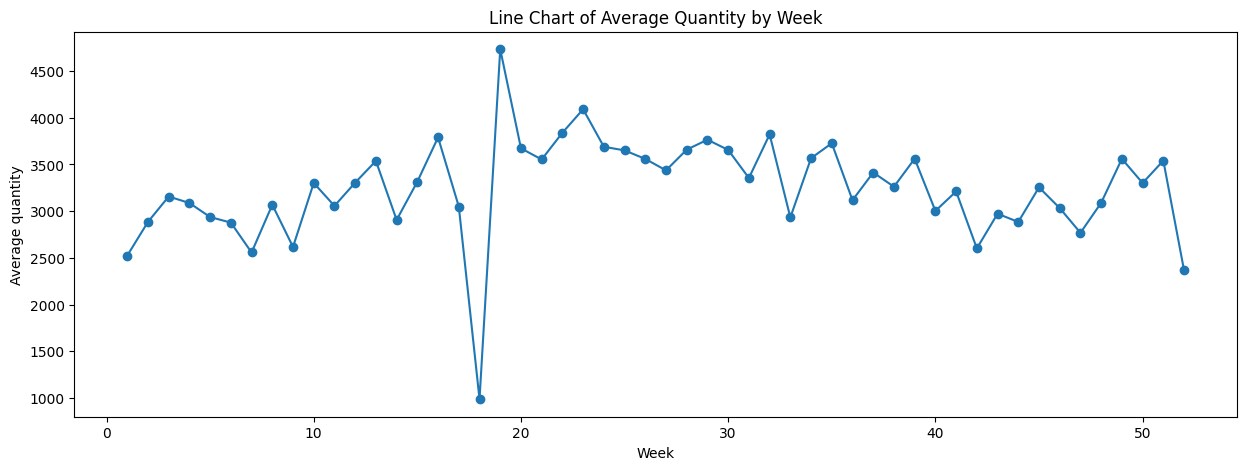

In [22]:
start_date = pd.Timestamp('2021-12-27')
end_date = pd.Timestamp('2023-04-03')
plot_average_quantity(df, start_date, end_date, 'week')

* Tren penjualan barang yang terjual selama periode waktu berdasarkan mingguan.
* Dengan melihat pergerakan rata-rata kuantitas barang yang terjual, kita dapat mengetahui apakah penjualan meningkat, menurun, atau stagnan selama rentang waktu tertentu.
* Selain itu, kita juga dapat melihat pola atau musiman yang mungkin mempengaruhi penjualan barang selama rentang waktu tersebut. 
* Dari line graph di atas terdapat penurunan yang cukup signifikan di week 19 (5/9/2022) dan tren menaik kembali pada week selanjutnya, dalam hal ini kita perlu mempertimbangkan faktor eksternal seperti apakah musim atau promo yang dapat mempengaruhi hasil penjualan pada suatu periode. 

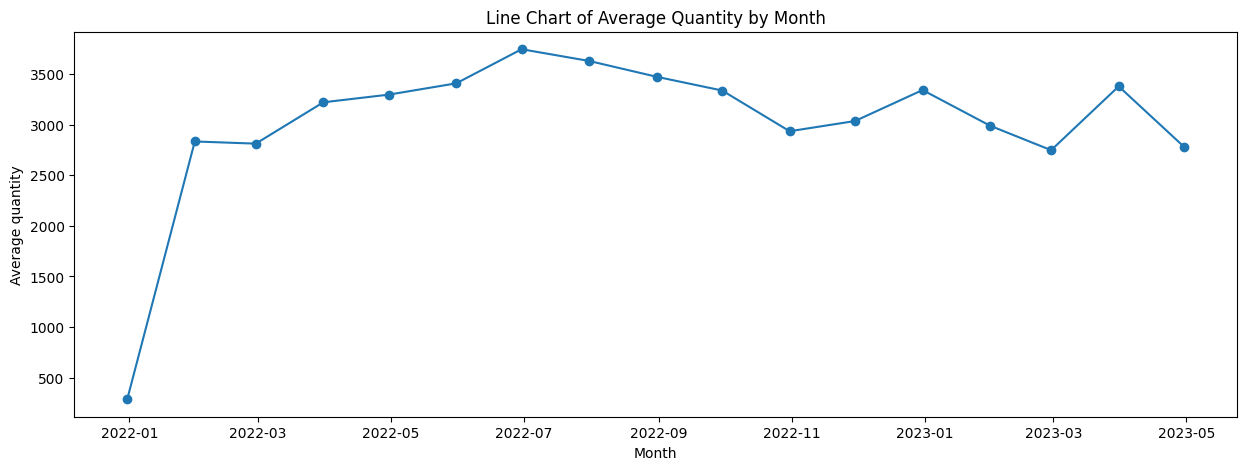

In [23]:
start_date = pd.Timestamp('2021-12-27')
end_date = pd.Timestamp('2023-04-03')
plot_average_quantity(df, start_date, end_date, 'month')

* line chart di atas merepresentasikan tren quantity berdasarkan quantity bulanan 

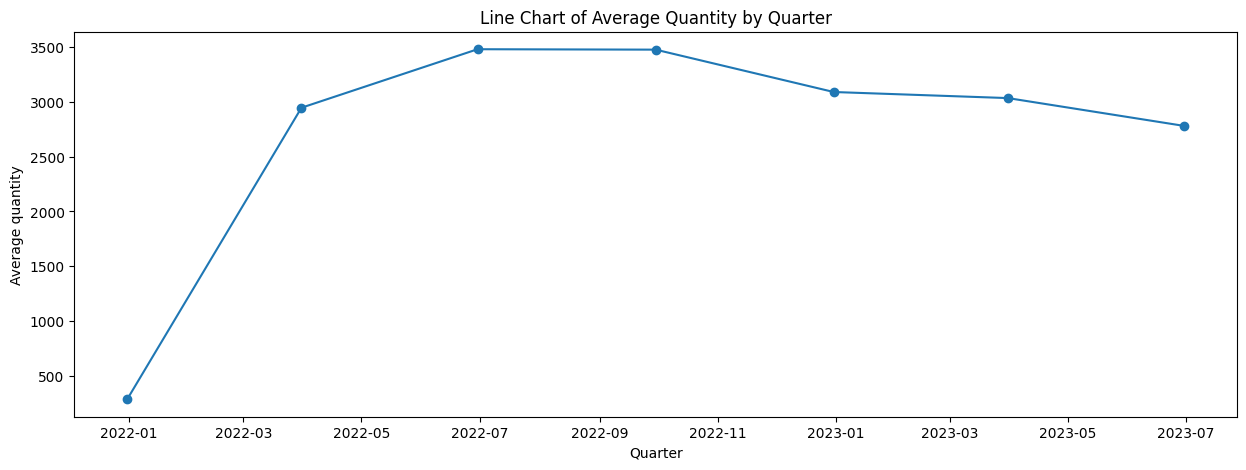

In [24]:
start_date = pd.Timestamp('2021-12-27')
end_date = pd.Timestamp('2023-04-03')
plot_average_quantity(df, start_date, end_date, 'quarter')

* line chart di atas merepresentasikan tren quantity berdasarkan quantity quarter

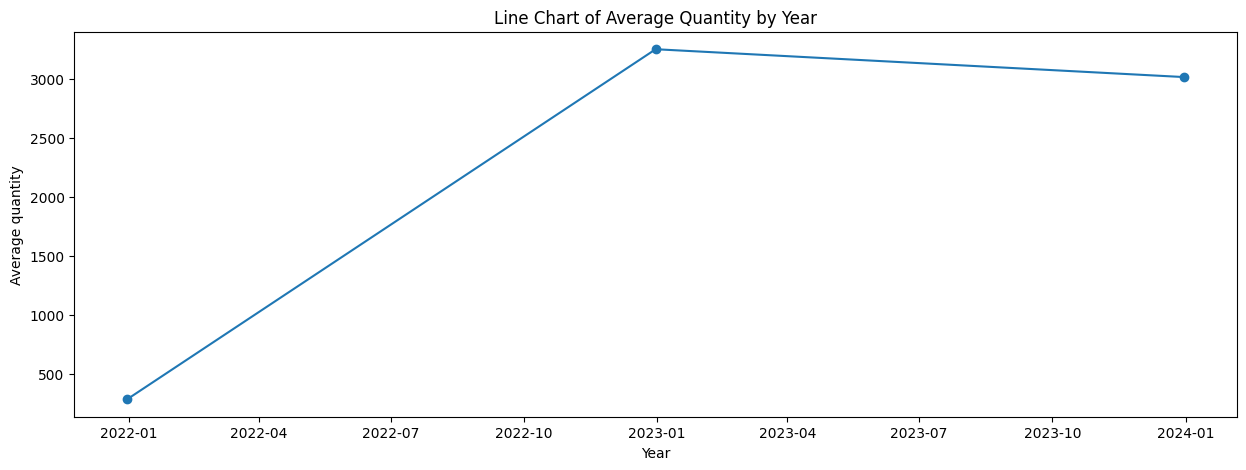

In [25]:
start_date = pd.Timestamp('2021-12-27')
end_date = pd.Timestamp('2023-04-03')
plot_average_quantity(df, start_date, end_date, 'year')

* line chart di atas merepresentasikan tren quantity berdasarkan quantity tahunan

# V. Data Preprocessing

In [13]:
#groupby week_startdate berdasarkan sum dari quantity
df4=df.groupby('week_start_date')[['quantity']].sum()
df4

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


* Kode di atas menggunakan metode groupby() pada data frame df untuk mengelompokkan data berdasarkan nilai unik pada kolom week_start_date. Kemudian, dilakukan agregasi dengan menghitung jumlah (sum()) dari kolom quantity pada setiap kelompok data.
* Dengan menggunakan metode groupby() dan agregasi, kita dapat memperoleh informasi yang lebih terperinci mengenai data yang ada, seperti total penjualan pada setiap minggunya.

In [14]:
# Set index dataframe baru
df4 = df4.set_index(pd.to_datetime(df4.index))
df4

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


# Time Series Decomposition

<Figure size 1600x900 with 0 Axes>

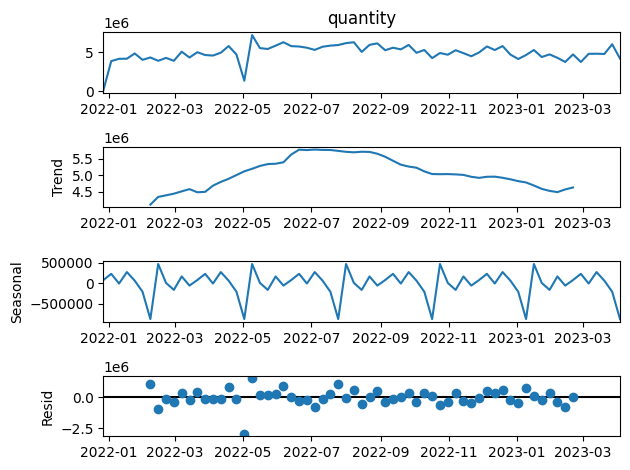

In [31]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(df4['quantity'], period=12)

fig = result_H.plot() 


* Kode di atas menggunakan library matplotlib untuk membuat plot, dengan membuat objek figure baru dan menentukan ukurannya. Kemudian, dilakukan dekomposisi musiman (seasonal decompose) pada data df4['quantity'] menggunakan metode period dengan nilai 12, yang mengindikasikan bahwa data dianggap memiliki pola musiman yang berulang setiap 12 minggu.
* Komponen trend menunjukkan adanya kenaikan secara naik-turun pada data. Pola ini dapat mengindikasikan fluktuasi nilai data dalam jangka waktu tertentu, di mana nilai data naik pada beberapa periode dan turun pada periode selanjutnya, dan demikian seterusnya.
* Komponen seasonal menunjukkan adanya fluktuasi yang teratur setiap 3 bulan (bulanan) pada data.
* Komponen residual menunjukkan fluktuasi yang tidak teratur pada data.

# Multiplicative

<Figure size 1600x900 with 0 Axes>

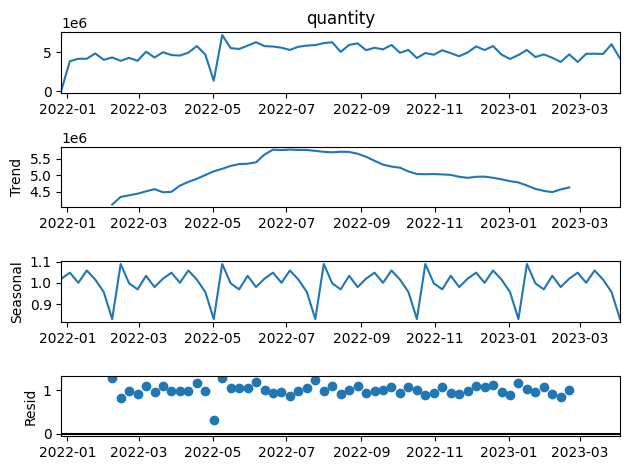

In [32]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(df4['quantity'], period=12,model= 'multiplicative')

fig = result_H.plot() 


* Dalam pemodelan forecast akan di lakukan menggunakan beberapa model salah satunya model Holt winter

* Dalam penggunaan model Holt-Winters, kita dapat menggunakan dua jenis metode yaitu additive dan multiplicative, tergantung pada bagaimana hubungan antara level dan fluktuasi musiman pada data. Jika fluktuasi musiman pada data tidak bergantung pada level datanya, maka metode yang digunakan adalah additive. Namun, jika fluktuasi musiman pada data berubah secara proporsional terhadap level datanya, maka metode yang digunakan adalah multiplicative.

* jika di lihat seasonal decompose awal dengan graph di atas memiliki fluktuasi musiman pada data berubah secara proporsional terhadap level datanya

# Spliting data into Train and Test

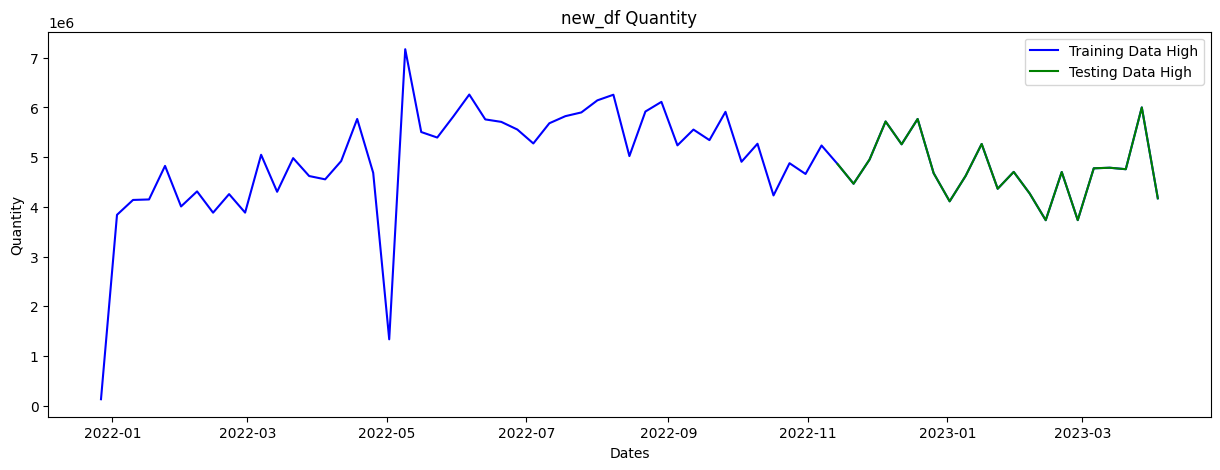

In [16]:
# split data dengan rasio 70:30
train_data, test_data = df4[0:int(len(df4)*0.7)], df4[int(len(df4)*0.7):]

# visualisasi data latih dan data uji
plt.figure(figsize=(15,5))
plt.title('new_df Quantity') # menambahkan judul plot
plt.xlabel('Dates') # menambahkan label sumbu x dengan teks 'Dates'
plt.ylabel('Quantity')
plt.plot(df4['quantity'], 'blue', label='Training Data High')
plt.plot(test_data['quantity'], 'green', label='Testing Data High')
plt.legend()

* Code tersebut digunakan untuk membagi data df4 menjadi data latih (train_data) dan data uji (test_data) dengan rasio 70:30. Data latih akan digunakan untuk melatih model, sedangkan data uji akan digunakan untuk menguji kinerja model

# Stationary

In [34]:
#  fungsi check_stationarity
def check_stationarity(series):
    result = adfuller(series.values) # menjalankan Augmented Dickey-Fuller Test pada seri data
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1]) # mencetak nilai p-value
    print('Critical Values:')
    for key, value in result[4].items(): # melakukan looping 
        print('\t%s: %.3f' % (key, value)) # mencetak nilai critical value 

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]): # pengecekan apakah p-value <= 0.05 
        print("\u001b[32mStationary\u001b[0m")
    else: # Jika seri data tersebut non-stationary, maka:
        print("\x1b[31mNon-stationary\x1b[0m") # mencetak teks 'Non-stationary'
        diff = series.diff().dropna()
        check_stationarity(diff)
      

In [35]:
check_stationarity(train_data['quantity'])

ADF Statistic: -6.692584
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Stationary


* hasil pengecekan data menunjukkan data tersebut stationary, maka artinya data tersebut memiliki properti statistik yang tidak berubah secara signifikan dari waktu ke waktu. Dengan kata lain, data tersebut stabil dalam arti tidak memiliki tren atau musim yang signifikan dan variansi datanya juga konstan. Hal ini penting karena memungkinkan kita untuk menerapkan model statistik seperti ARIMA untuk memprediksi nilai-nilai masa depan dari data tersebut.

### Autocorrelation

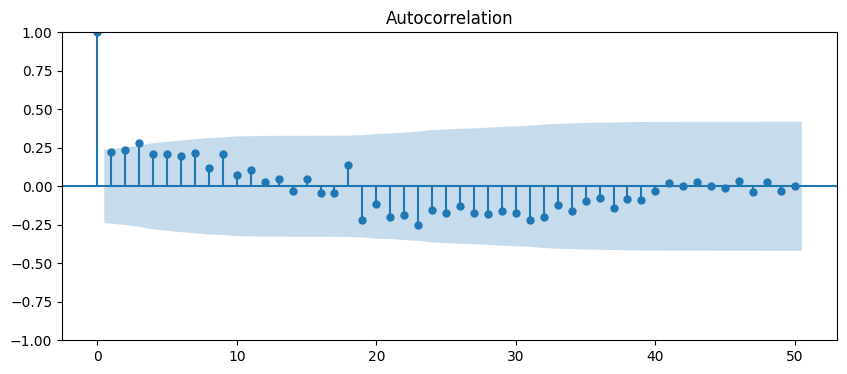

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(df4['quantity'], lags=50,ax=ax)

* ACF membantu kita mengidentifikasi nilai Moving Average, ACF merepresentasikan nilai Q. Nilai Q adalah salah satu parameter dalam model ARIMA (Autoregressive Integrated Moving Average) yang digunakan untuk memodelkan data time series. nilai q di atas adalah 3.

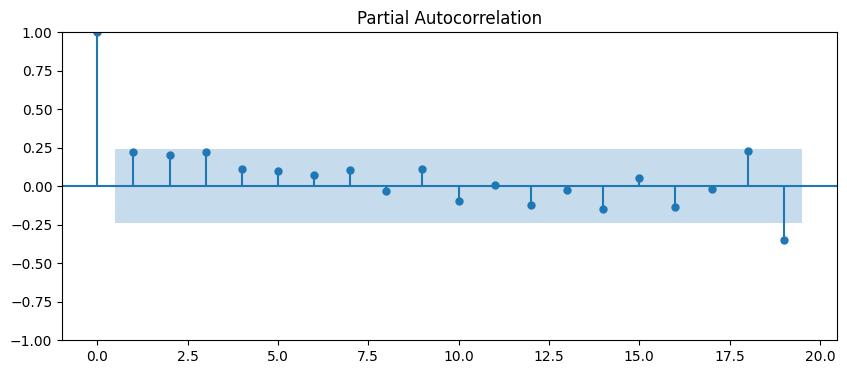

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(df4['quantity'],ax=ax)

* Berdasarkan PACF, kita harus mulai dengan model Auto Regressive dengan lag 19, PACF merepresentasikan nilai P

# VI. Modeling

## HOLT - WINTERS

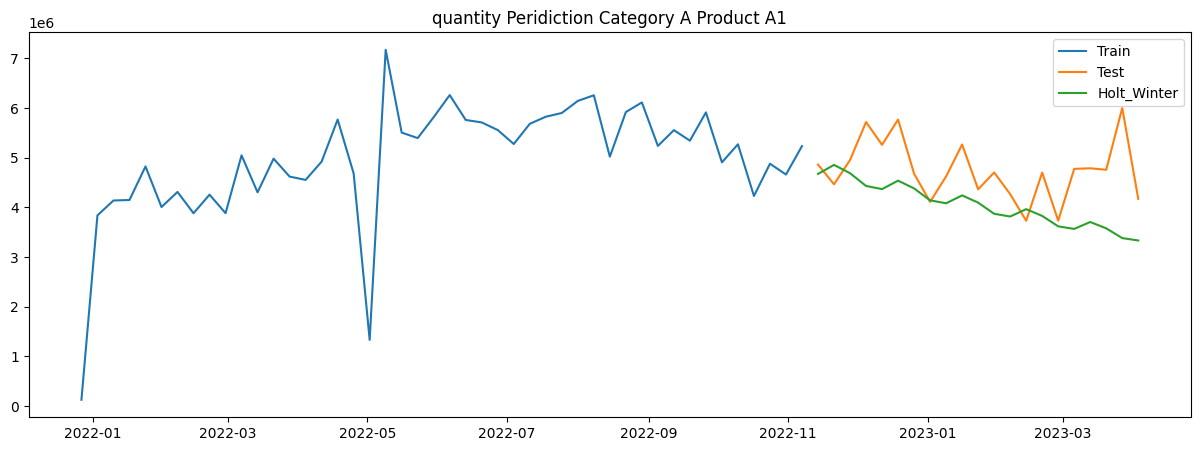

In [17]:
# Exponential Smoothing dengan metode Holt-Winters untuk melakukan prediksi terhadap data time series.
y_hat_avg = test_data.copy()
fit1 = ExponentialSmoothing(np.asarray(train_data['quantity']) ,seasonal_periods=4 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
plt.figure(figsize=(15,5))
plt.plot( train_data['quantity'], label='Train')
plt.plot(test_data['quantity'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('quantity Peridiction Category A Product A1')
plt.legend(loc='best')
plt.show()

* Grafik diatas menunjukkan hasil prediksi dan perbandingannya dengan data asli. Garis biru menunjukkan data latih, garis orange menunjukkan data uji, dan garis hijau menunjukkan hasil prediksi menggunakan model Holt-Winters dengan parameter tertentu. Jika garis hijau (prediksi) cukup akurat dalam memprediksi data uji, maka model tersebut dapat dianggap baik dalam melakukan prediksi. Namun, jika garis hijau jauh dari garis orange, maka model tersebut perlu dikaji ulang dan mungkin perlu disesuaikan dengan parameter yang lebih sesuai.
* Jika di lihat garis hijau cukup jauh dari garis orange maka model ini harus di kaji ulang agar mendapatkan hasil yang lebih baik.

In [39]:
print("MAE :", mean_absolute_error(test_data.quantity, y_hat_avg.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(test_data.quantity, y_hat_avg.Holt_Winter)))

MAE : 754209.1881863488
RMSE : 951746.250698097


In [19]:
train_dat = train_data['quantity'].values
test_dat = test_data['quantity'].values

actual_dat=pd.DataFrame()
actual_dat=pd.DataFrame(test_dat,columns=["Actual_dat"])
predicted_dat=pd.DataFrame(list(y_hat_avg['Holt_Winter']),columns=["Predicted_dat"])
actual_dat=actual_dat.reset_index(drop=True)
predicted_dat=predicted_dat.reset_index(drop=True)
output_HW=pd.concat([actual_dat,predicted_dat],axis=1)
output_HW

,Actual_dat,Predicted_dat
0,4861820,4.673326e+06
1,4465411,4.855554e+06
2,4953197,4.688434e+06
3,5717901,4.431607e+06
4,5259200,4.368159e+06
5,5768419,4.538487e+06
6,4677997,4.382281e+06
7,4111427,4.142224e+06
8,4623965,4.082919e+06
9,5265632,4.242125e+06


* Berikut adalah hasil dari actual data dan predict data, hasil yang di dapatkan tidak dapat di katakan bagus/akurat.

## ARIMA

In [20]:
# Arima model
model_arima = ARIMA(train_dat, order=(19,0,3)) # p,d,q nilai di ambil dari pengecekan ACF dan PDACF di atas
model_123=model_arima.fit()

In [21]:
Predictions_ar = model_123.forecast(steps = len(test_dat))

Text(0, 0.5, 'Quantity')

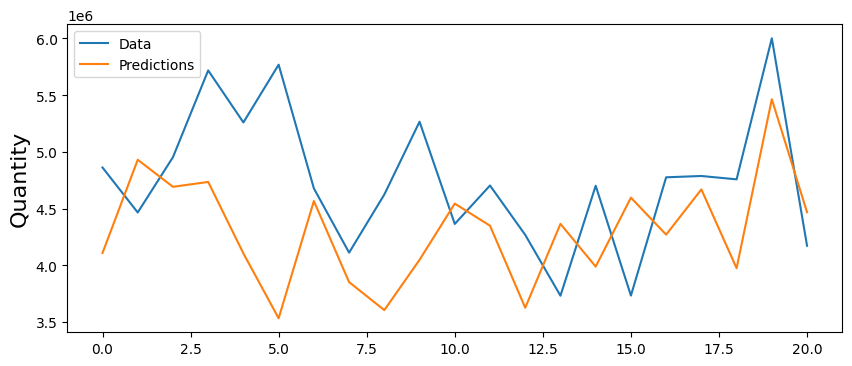

In [22]:
plt.figure(figsize=(10,4))

plt.plot(test_dat)
plt.plot(Predictions_ar)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Quantity', fontsize=16)

* Grafik menunjukkan hasil prediksi dan data aktual dari quantity. Garis biru menunjukkan data aktual dan garis oranye menunjukkan hasil prediksi. Dapat dilihat bahwa prediksi secara umum mengikuti tren data aktual dengan cukup baik, namun terdapat beberapa titik di mana prediksi agak jauh dari data aktual. Oleh karena itu, model prediksi dapat ditingkatkan untuk memberikan hasil yang lebih akurat dan dapat diandalkan. namun secara keseluruhan model mengikuti tren data actual baik.

In [44]:
# Convert the result into dataframe

actual_dat=pd.DataFrame()
actual_dat=pd.DataFrame(test_data,columns=["quantity"])
predicted_dat=pd.DataFrame(list(Predictions_ar),columns=["Predicted_data"])
actual_dat=actual_dat.reset_index(drop=True)
predicted_dat=predicted_dat.reset_index(drop=True)
output_dat=pd.concat([actual_dat,predicted_dat],axis=1)
output_dat

,quantity,Predicted_data
0,4861820,5.042844e+06
1,4465411,4.916469e+06
2,4953197,4.843493e+06
3,5717901,4.973940e+06
4,5259200,5.137508e+06
5,5768419,4.997115e+06
6,4677997,5.165478e+06
7,4111427,4.867876e+06
8,4623965,4.785101e+06
9,5265632,4.919028e+06


# Evaluation
Lets see the evaluation from this model

# Arima

In [45]:
# menghitung beberapa metrik evaluasi untuk mengukur performa model
MEAN_arima = df4['quantity'].mean()
MAE_arima = mean_absolute_error(output_dat['quantity'], output_dat['Predicted_data'])
MSE_arima = mean_squared_error(output_dat['quantity'], output_dat['Predicted_data'])
RMSE_arima = np.sqrt(mean_squared_error(output_dat['quantity'], output_dat['Predicted_data']))
MAPE_arima = mean_absolute_percentage_error(output_dat['quantity'], output_dat['Predicted_data'])

In [46]:
# membuat Pandas DataFrame "score" yang berisi metrik evaluasi untuk prediksi model ARIMA.
predict = ['quantity']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_arima)
score['MAE']= (MAE_arima)
score['MSE']= (MSE_arima)
score['RMSE']=(RMSE_arima)
score['MAPE']=(MAPE_arima)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,quantity,4.893709e+06,495038.898145,3.882253e+11,623077.320847,0.109112


* Berdasarkan data tersebut, terdapat 6 metric evaluasi performa model yang digunakan yaitu MEAN, MAE, MSE, RMSE, dan MAPE.

    * MEAN menghitung nilai rata-rata dari data yang diprediksi, di sini nilai MEAN sebesar 4.893.709 yang berarti nilai rata-rata prediksi kuantitas adalah 4.893.709.

    * MAE (Mean Absolute Error) mengukur rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi, di sini nilai MAE sebesar 495.038 yang berarti rata-rata selisih absolut antara nilai aktual dan nilai prediksi adalah 495.038.

    * MSE (Mean Squared Error) mengukur rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi, di sini nilai MSE sebesar 3.882.253e+11 yang berarti rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi adalah 3.882.253e+11.

    * RMSE (Root Mean Squared Error) mengukur akar dari rata-rata kuadrat selisih antara nilai aktual dan nilai prediksi, di sini nilai RMSE sebesar 623.077 yang berarti akar dari rata-rata kuadrat selisih antara nilai aktual dan nilai prediksi adalah 623.077.

    * MAPE (Mean Absolute Percentage Error) menghitung rata-rata persentase selisih antara nilai aktual dan nilai prediksi, di sini nilai MAPE sebesar 0.109112 yang berarti rata-rata persentase selisih antara nilai aktual dan nilai prediksi adalah sebesar 10.91%.

    * Dari data tersebut, secara umum dapat disimpulkan bahwa model prediksi menghasilkan MAPE yang relatif rendah, yang berarti model memiliki kemampuan yang baik untuk melakukan prediksi. Namun, tetap perlu diperhatikan nilai-nilai lainnya untuk memastikan performa model yang lebih baik lagi.






In [47]:
# % metrik evaluasi MAPE
quantity = output_dat['quantity']
Predicted_data = output_dat['Predicted_data']
n = len(quantity)
MAPE = (1 / n) * np.sum(np.abs((quantity - Predicted_data) / quantity)) * 100
MAPE

10.91118372515481

In [48]:
output_dat

,quantity,Predicted_data
0,4861820,5.042844e+06
1,4465411,4.916469e+06
2,4953197,4.843493e+06
3,5717901,4.973940e+06
4,5259200,5.137508e+06
5,5768419,4.997115e+06
6,4677997,5.165478e+06
7,4111427,4.867876e+06
8,4623965,4.785101e+06
9,5265632,4.919028e+06


## HOLT - WINTERS

In [49]:
# menghitung beberapa metrik evaluasi untuk mengukur performa model
MEAN_HW = df4['quantity'].mean()
MAE_HW = mean_absolute_error(output_HW['Actual_dat'],output_HW['Predicted_dat'])
MSE_HW = mean_squared_error(output_HW['Actual_dat'],output_HW['Predicted_dat'])
RMSE_HW = np.sqrt(mean_squared_error(output_HW['Actual_dat'], output_HW['Predicted_dat']))
MAPE_HW = mean_absolute_percentage_error(output_HW['Actual_dat'], output_HW['Predicted_dat'])

In [50]:
# membuat Pandas DataFrame "score" yang berisi metrik evaluasi untuk prediksi model ARIMA.
predict = ['quantity']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_HW)
score['MAE']= (MAE_HW)
score['MSE']= (MSE_HW)
score['RMSE']=(RMSE_HW)
score['MAPE']=(MAPE_HW)
score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,quantity,4.893709e+06,754209.188186,9.058209e+11,951746.250698,0.150285


* Demikian pula, pada kumpulan data kedua, model memiliki MAE 754.209,188186, lebih tinggi dari kasus sebelumnya. MSE adalah 9.058209e+11, yang juga lebih tinggi dari kasus sebelumnya. RMSE adalah 951.746,250698, yang juga lebih tinggi dari kasus sebelumnya. MAPE adalah 0,150285, yang menunjukkan bahwa rata-rata, nilai prediksi sekitar 15,0% dari nilai sebenarnya. secara keseluruhan, model ini menunjukkan bahwa model memiliki tingkat kesalahan dan variabilitas yang tinggi di bandingkan dengan model arima.

In [51]:
output_HW

,Actual_dat,Predicted_dat
0,4861820,4.673326e+06
1,4465411,4.855554e+06
2,4953197,4.688434e+06
3,5717901,4.431607e+06
4,5259200,4.368159e+06
5,5768419,4.538487e+06
6,4677997,4.382281e+06
7,4111427,4.142224e+06
8,4623965,4.082919e+06
9,5265632,4.242125e+06


## Seasonal ARIMA Exogenous (SARIMAX)

In [91]:
# Define the model with order (1, 1, 1) and seasonal order (0, 1, 1, 12)
model2 = sm.tsa.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

# Fit the model to the data
model_sar = model2.fit()

In [96]:
start_date = '2021-12-27'
end_date = '2023-04-03'
predictions2 = model_sar.forecast(len(test_data))

Text(0, 0.5, 'Sales')

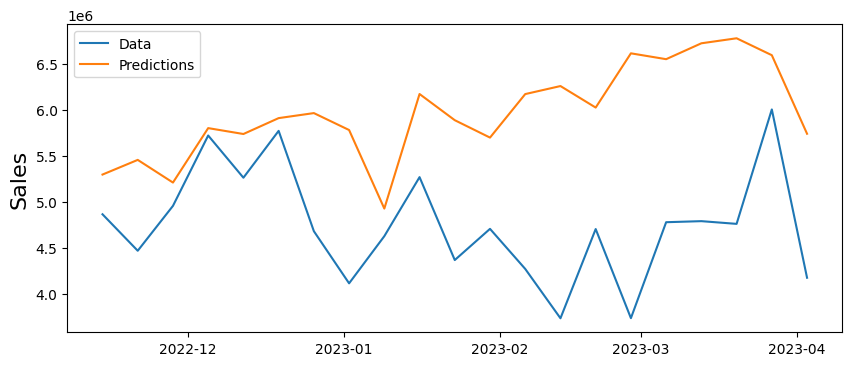

In [97]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions2)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [98]:
mean_absolute_error(test_data, predictions2)

1215721.348219873

In [99]:
mean_absolute_percentage_error(test_data,predictions2)

0.27667651200212423

* Mape yang di hasilkan pada model sarima jauh lebih bersar di bandingkan dengan model Arima dan Holt winter, dengan demikian model ini harus memiliki improvment lagi.

# VII. FORECAST

## Arima

In [54]:
# Forecast for the next 14 day
forecast_ar = model_arima.predict(start = len(df4), 
                          end = (len(df4)-1) + 15 
                          )

In [55]:
forecast_df = pd.DataFrame(forecast_ar)
forecast_df = forecast_df.rename(columns={0: 'Forecast'})
forecast_df

,Forecast
2023-04-10,4.944192e+06
2023-04-17,4.863768e+06
2023-04-24,5.252665e+06
2023-05-01,4.708435e+06
2023-05-08,4.893709e+06
2023-05-15,4.893709e+06
2023-05-22,4.893709e+06
2023-05-29,4.893709e+06
2023-06-05,4.893709e+06
2023-06-12,4.893709e+06


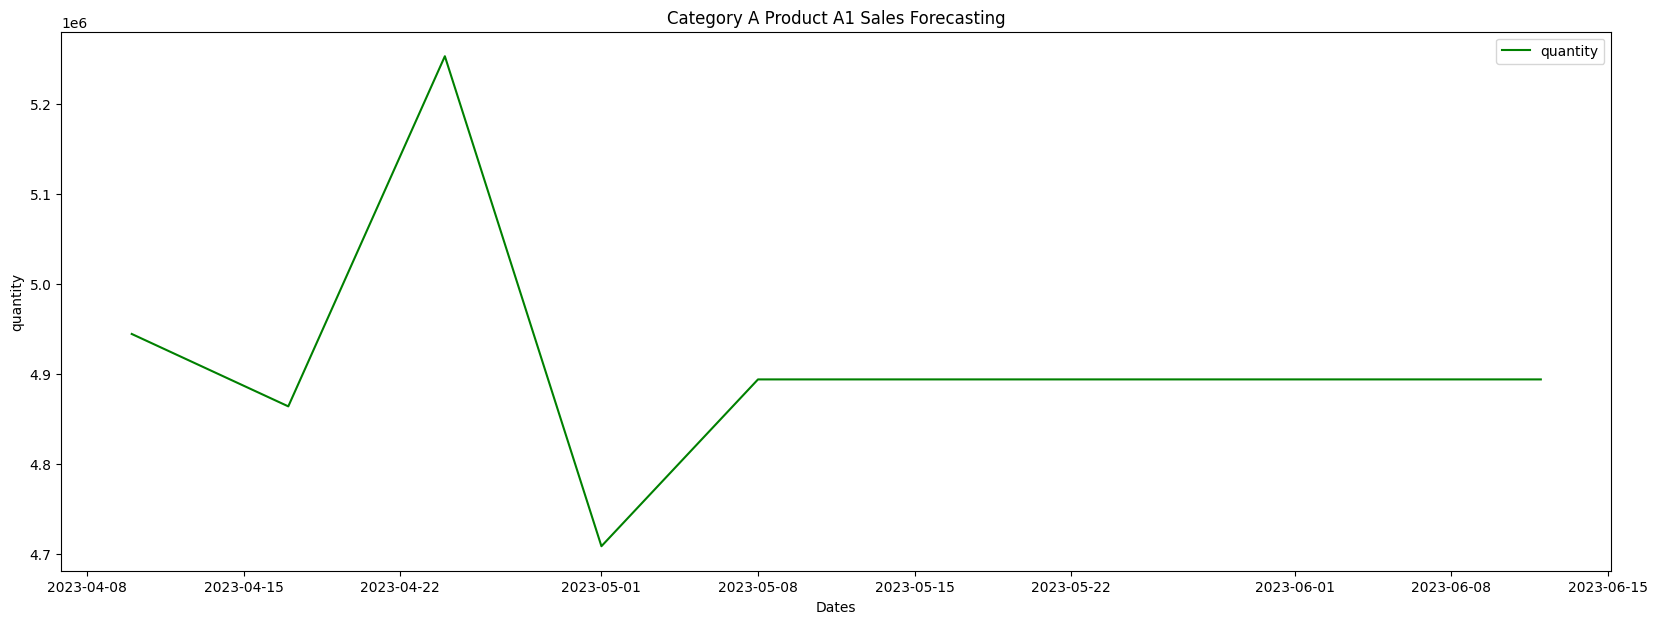

In [56]:
# ploting the result 
plt.figure(figsize=(20,7))
plt.plot(forecast_ar, color='green', label='quantity')
plt.title('Category A Product A1 Sales Forecasting')
plt.xlabel('Dates')
plt.ylabel('quantity')
plt.legend()

* Dari forecast di atas, dapat dilihat bahwa jumlah quantity diprediksi akan menurun pada minggu ke-2 dan ke-4, namun akan meningkat pada minggu ke-3 dengan nilai yang cukup tinggi. Selanjutnya, pada minggu ke-5, nilai quantity diprediksi akan kembali ke nilai rata-rata yang ada. Meskipun ada penurunan dan peningkatan yang cukup signifikan pada beberapa minggu, secara keseluruhan, nilai quantity diprediksi akan stabil pada kisaran 4.7 juta hingga 5.2 juta.

# VIII. Kesimpulan 

1. Pada forecast dataset ini melakukan uji 3 model dengan tingkatan mape yaitu :
    * Model Arima MAPE yang di hasilkan 10 % yang sama dengan 90% accuracy model 
    * Model Holt Winter MAPE yang di hasilkan 15 % yang sama dengan 85% accuracy model
    * Model Sarimax MAPE yang di hasilkan 27 % yang sama dengan 73% accuracy model 

Dengan demikian dapat disimpulkan bahwa model terbaik untuk forecast adalah Arima dengan accuracy 90%

2. Dengan hasil forecast tersebut, yaitu bahwa jumlah quantity diprediksi akan menurun pada minggu ke-2 dan ke-4, namun akan meningkat pada minggu ke-3 dengan nilai yang cukup tinggi. Selanjutnya, pada minggu ke-5, nilai quantity diprediksi akan kembali ke nilai rata-rata yang ada. Namun, dengan akurasi model 90%, kita dapat lebih yakin bahwa prediksi tersebut lebih akurat dan dapat diandalkan untuk membuat keputusan bisnis dan perencanaan produksi di masa depan.

3. Tujuan bisnis dari forecast quantity adalah untuk membantu perusahaan dalam merencanakan strategi bisnis dan mengambil keputusan yang tepat terkait dengan produksi, persediaan, pemasaran, dan penjualan. Dengan memprediksi jumlah quantity yang akan terjual di masa depan, perusahaan dapat mengetahui permintaan pasar dan mempersiapkan persediaan produk yang cukup, sehingga dapat meningkatkan efisiensi produksi dan meminimalkan risiko kerugian akibat kekurangan atau kelebihan stok. Selain itu, perusahaan juga dapat menyesuaikan strategi pemasaran dan penjualan untuk meningkatkan pangsa pasar dan keuntungan.

# Bisnis Improvment

* Berdasarkan kesimpulan dari hasil forecast tersebut, ada beberapa sisi bisnis yang perlu ditingkatkan, yaitu:

1. Perencanaan produksi: Dengan mengetahui perkiraan jumlah quantity di masa depan, perusahaan dapat lebih baik dalam merencanakan produksi untuk mengakomodasi permintaan pasar dan mencegah terjadinya kekurangan atau kelebihan produksi.

2. Pengembangan strategi pemasaran: Dengan mengetahui perkiraan jumlah quantity di masa depan, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif untuk meningkatkan penjualan dan memaksimalkan keuntungan.

3. Pengembangan strategi harga: Dengan mengetahui perkiraan jumlah quantity di masa depan, perusahaan dapat mengembangkan strategi harga yang lebih efektif untuk meningkatkan penjualan dan memaksimalkan keuntungan.

Dengan meningkatkan sisi-sisi bisnis tersebut, perusahaan dapat meningkatkan efisiensi dan efektivitas operasional, meningkatkan keuntungan, dan memenuhi kebutuhan pelanggan secara lebih baik.




